# Analyze the data on unfiltered_dataset.csv

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [2]:
df = pd.read_csv(r"D:\GitHub\PUCP-Inti-Data\Data Preprocessing\unfiltered_dataset.csv")

C:\Users\syaba\AppData\Local\Temp\ipykernel_30136\286547288.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\GitHub\PUCP-Inti-Data\Data Preprocessing\unfiltered_dataset.csv")


## Formatting

Drop duplicates

In [3]:
initial_len = df.shape[0]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
final_len = df.shape[0]
print(f"Original rows: {initial_len}.\nUnique rows: {final_len}.\nDropped {initial_len - final_len} samples.")


Original rows: 1732910.
Unique rows: 1708501.
Dropped 24409 samples.


Timestamp as datetime object

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Count samples by module

<Axes: title={'center': 'Module Name Distribution'}, xlabel='module_name'>

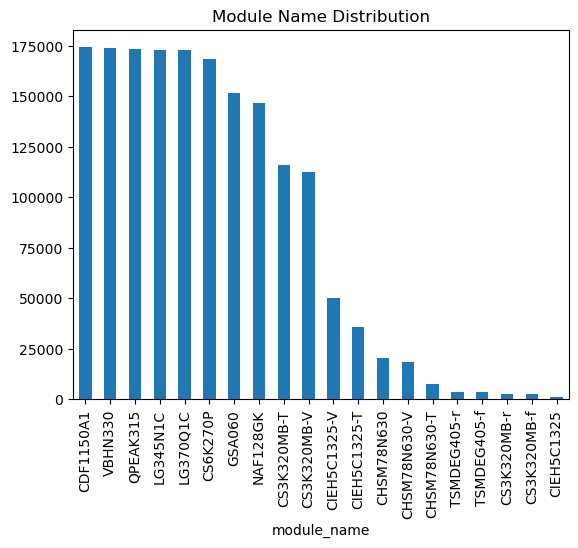

In [5]:
module_counts = df['module_name'].value_counts()
module_counts.plot(kind='bar', title='Module Name Distribution')

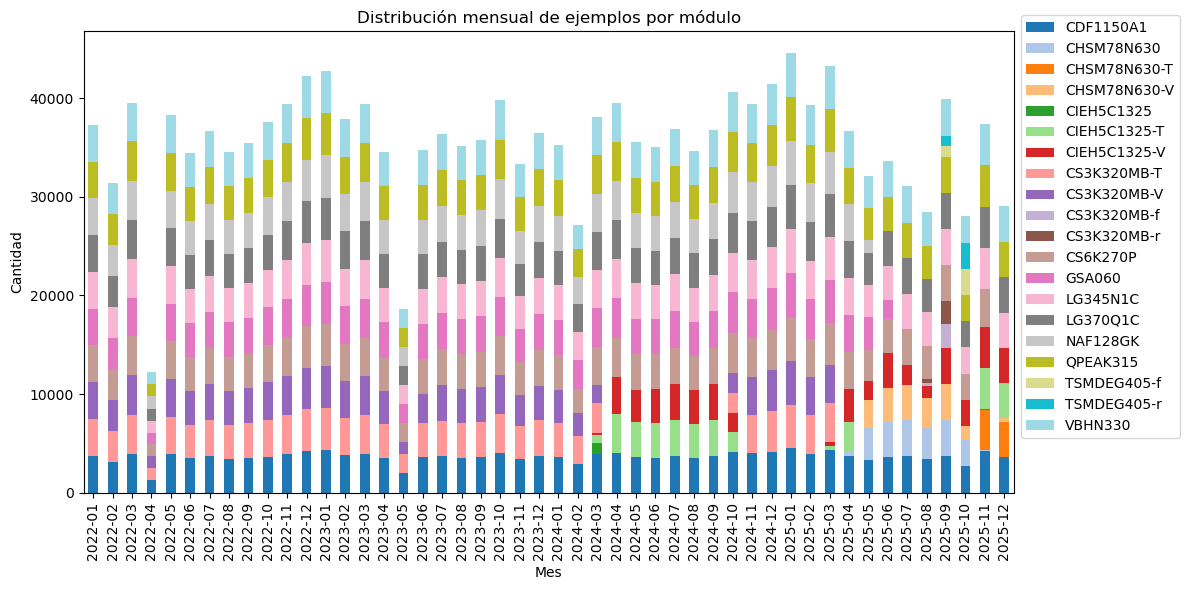

In [6]:
import matplotlib.pyplot as plt

# Add year-month column
df['year_month'] = df['timestamp'].dt.to_period('M')

# Count examples per (year_month, module_name)
counts = (
    df
    .groupby(['year_month', 'module_name'])
    .size()
    .unstack(fill_value=0)   # columns = module_name
)

# Plot stacked bars
counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)

plt.title("Distribución mensual de ejemplos por módulo")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
# legend outside
plt.legend(bbox_to_anchor=(1, 1.05))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Cleaning up

In [7]:
df.columns

Index(['filename', 'module_name', 'timestamp', 'Vmpp', 'Impp', 'Pmpp', 'Voc',
       'Imin', 'Isc', 'G_spec_int', 'G_tilt20_start', 'G_tilt15_start',
       'G_horiz_start', 'G_east_start', 'G_west_start', 'G_refl_start',
       'G_horiz_end', 'G_tilt20_end', 'G_tilt15_end', 'G_east_end',
       'G_west_end', 'G_refl_end', 'module_temperature_center',
       'module_temperature_lateral', 'air_temperature', 'relative_humidity',
       'air_density', 'abs_pressure', 'wind_speed_ms', 'wind_direction',
       'year_month'],
      dtype='object')

In [8]:
df.describe()

,timestamp,Vmpp,Impp,Pmpp,Voc,Imin,Isc,G_spec_int,G_tilt20_start,G_tilt15_start,G_horiz_start,G_east_start,G_west_start,G_refl_start,G_horiz_end,G_tilt20_end,G_tilt15_end,G_east_end,G_west_end,G_refl_end,module_temperature_center,air_temperature,relative_humidity,air_density,abs_pressure,wind_speed_ms,wind_direction
count,1708501,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.616184e+06,1.708501e+06,1.439439e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.439439e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06,1.708501e+06
mean,2024-01-04 04:18:24.911892480,4.010560e+01,2.537277e+00,9.046816e+01,4.918091e+01,9.028608e-03,-1.832843e+00,1.312753e+73,4.015018e+02,3.901335e+02,4.223326e+02,1.877512e+02,2.283520e+02,4.226913e+01,4.091459e+02,3.947518e+02,3.902427e+02,1.877702e+02,2.283426e+02,4.226551e+01,3.702720e+34,9.964580e+31,9.739703e+26,6.027319e+26,1.002288e+03,1.262609e+00,-3.594380e+31
min,2022-01-01 06:30:01,-1.095690e+01,-7.348790e-01,-3.616600e-02,-1.092821e+01,-1.686354e+00,-2.044775e+05,-6.665134e+26,1.101000e+01,-6.000000e-02,3.580000e+00,2.200000e-01,3.700000e-01,-1.300000e-01,-6.100000e-01,2.900000e-01,-9.000000e-02,2.300000e-01,0.000000e+00,1.700000e-01,-9.900000e+37,-4.559000e+04,-1.310723e+05,-1.342516e+08,0.000000e+00,0.000000e+00,-7.571548e+37
25%,2023-01-06 14:55:19,3.174063e+01,6.051810e-01,2.580334e+01,3.738397e+01,2.279000e-03,-5.127368e+00,9.155005e+01,1.430500e+02,1.345300e+02,1.536000e+02,6.709000e+01,7.419000e+01,1.542000e+01,1.453300e+02,1.364800e+02,1.346300e+02,6.712000e+01,7.417000e+01,1.541000e+01,2.540000e+01,1.729000e+01,7.926000e+01,1.170000e+00,1.003190e+03,6.200000e-01,1.596300e+02
50%,2024-01-09 11:38:06,3.371041e+01,1.620352e+00,6.350406e+01,3.956225e+01,7.824000e-03,3.157140e-01,2.298027e+02,3.121300e+02,3.009800e+02,3.311500e+02,1.285700e+02,1.486100e+02,3.654000e+01,3.207200e+02,3.053600e+02,3.010900e+02,1.286000e+02,1.485700e+02,3.654000e+01,3.175000e+01,1.980000e+01,8.392000e+01,1.190000e+00,1.004690e+03,1.040000e+00,2.023200e+02
75%,2024-12-29 12:35:19,5.330986e+01,3.747141e+00,1.319055e+02,6.483580e+01,1.129300e-02,2.253118e+00,4.728091e+02,6.302800e+02,6.113600e+02,6.547300e+02,2.293200e+02,3.091900e+02,6.429000e+01,6.404400e+02,6.235500e+02,6.115700e+02,2.293500e+02,3.092200e+02,6.428000e+01,4.110000e+01,2.207000e+01,8.896000e+01,1.200000e+00,1.006200e+03,1.730000e+00,2.406300e+02
max,2025-12-31 15:05:01,8.405376e+01,4.534277e+01,4.650164e+03,8.842789e+01,1.403229e+00,1.661115e+05,1.165367e+79,2.538770e+03,1.460320e+03,8.805814e+04,1.402550e+03,1.502250e+03,7.409400e+02,1.544920e+03,1.450160e+03,1.444120e+03,1.364710e+03,1.487120e+03,7.376300e+02,9.900000e+37,1.564571e+38,1.664029e+33,1.029768e+33,1.014850e+03,8.070000e+00,1.430545e+37
std,NaN,1.123154e+01,2.573680e+00,9.097005e+01,1.549414e+01,2.819920e-02,2.849526e+02,1.185802e+76,3.027013e+02,3.007423e+02,3.499353e+02,1.805174e+02,2.148414e+02,3.033435e+01,3.102311e+02,3.023997e+02,3.007224e+02,1.805220e+02,2.148553e+02,3.033962e+01,2.930245e+36,1.199324e+35,1.273073e+30,7.878287e+29,4.910304e+01,9.142908e-01,5.895132e+34


## Physics-based

In [9]:
def clean_by_physics(df):
    clean_df = df.copy()
    numeric_columns = clean_df.columns.drop(['filename', 'module_name', 'timestamp'])
    clean_df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # 1. Temperature: Terrestrial limits 
    temp_cols = ['air_temperature', 'module_temperature_center', 'module_temperature_lateral']
    for col in temp_cols:
        clean_df.loc[(clean_df[col] < -50) | (clean_df[col] > 100), col] = np.nan
        
    # 2. Irradiance (G_ columns): Cannot be negative or exceed solar constant
    g_cols = [c for c in clean_df.columns if c.startswith('G_')]
    for col in g_cols:
        clean_df.loc[(clean_df[col] < 0) | (clean_df[col] > 2000), col] = np.nan
        
    # 3. Humidity: Must be a percentage
    clean_df.loc[(clean_df['relative_humidity'] < 0) | (clean_df['relative_humidity'] > 100), 'relative_humidity'] = np.nan
    
    # 4. Wind Direction: 0 to 360 degrees
    clean_df.loc[(clean_df['wind_direction'] < 0) | (clean_df['wind_direction'] > 360), 'wind_direction'] = np.nan
    
    # 5. Air Density
    clean_df.loc[(clean_df['air_density'] < 0) | (clean_df['air_density'] > 2), 'air_density'] = np.nan
     
    # 6. Electrical parameters
    # TBD: Check Voc, Isc, Pmax against nominal values

    return clean_df

df_physics = clean_by_physics(df)

<Figure size 1000x600 with 0 Axes>

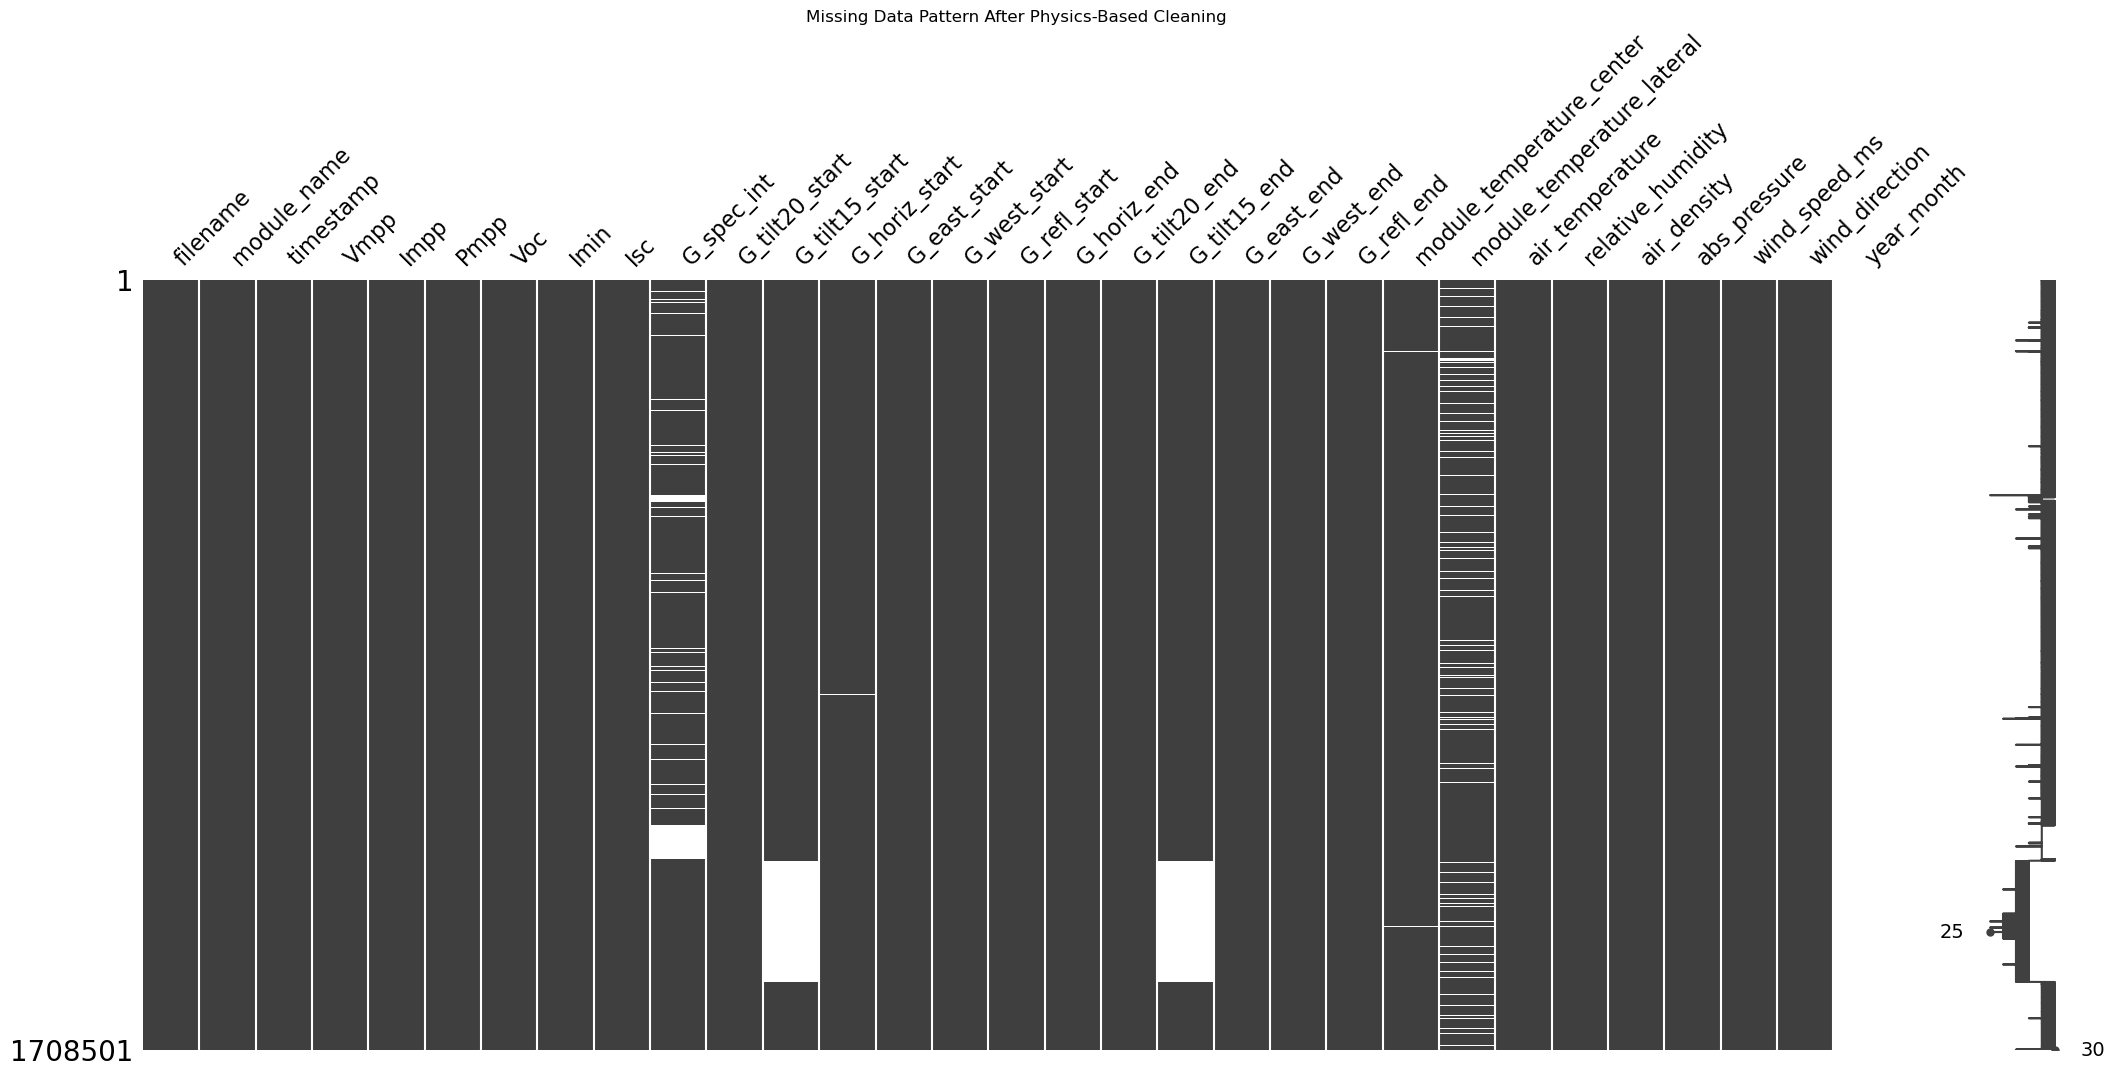

In [10]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize where the sensor errors were removed
plt.figure(figsize=(10,6))
msno.matrix(df_physics)
plt.title("Missing Data Pattern After Physics-Based Cleaning")
plt.show()

In [11]:
# List before and after cleaning per column
before_counts = df.count()
after_counts = df_physics.count()

# 2. Create the summary DataFrame
stats_df = pd.DataFrame({
    'Before': before_counts,
    'After': after_counts,
    'Removed': before_counts - after_counts
})

# 3. Add a percentage column (useful for the "Impact potential" section of your report)
stats_df['% Removed'] = ((stats_df['Removed'] / stats_df['Before']) * 100).round(2)

# Display the results
print(stats_df[stats_df['Removed'] > 0])

                             Before    After  Removed  % Removed
G_spec_int                  1616184  1537528    78656       4.87
G_tilt20_start              1708501  1708489       12       0.00
G_tilt15_start              1439439  1439431        8       0.00
G_horiz_start               1708501  1708157      344       0.02
G_refl_start                1708501  1708500        1       0.00
G_horiz_end                 1708501  1708500        1       0.00
G_tilt15_end                1439439  1439434        5       0.00
module_temperature_center   1708501  1704222     4279       0.25
module_temperature_lateral  1708501  1548727   159774       9.35
air_temperature             1708501  1708489       12       0.00
relative_humidity           1708501  1708491       10       0.00
air_density                 1708501  1708493        8       0.00
wind_direction              1708501  1708492        9       0.00
year_month                  1708501        0  1708501     100.00


In [12]:
print(f"Summary: {before_counts.sum() - after_counts.sum()} removed. {(before_counts.sum() - after_counts.sum())/before_counts.sum()*100:.2f}% of total data.")

Summary: 1951620 removed. 3.73% of total data.


## Statistics-based

In [13]:
def clean_by_iqr(df, multiplier=3.0):
    """
    multiplier=1.5 is standard (mild outliers)
    multiplier=3.0 is for extreme outliers (better for sensor errors)
    """
    clean_df = df.copy()
    numeric_columns = clean_df.columns.drop(['filename', 'module_name', 'timestamp'])
    clean_df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    for col in numeric_columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Replace outliers with NaN
        clean_df.loc[(clean_df[col] < lower_bound) | (clean_df[col] > upper_bound), col] = np.nan
        
    return clean_df

df_statistical = clean_by_iqr(df) 

<Figure size 1000x600 with 0 Axes>

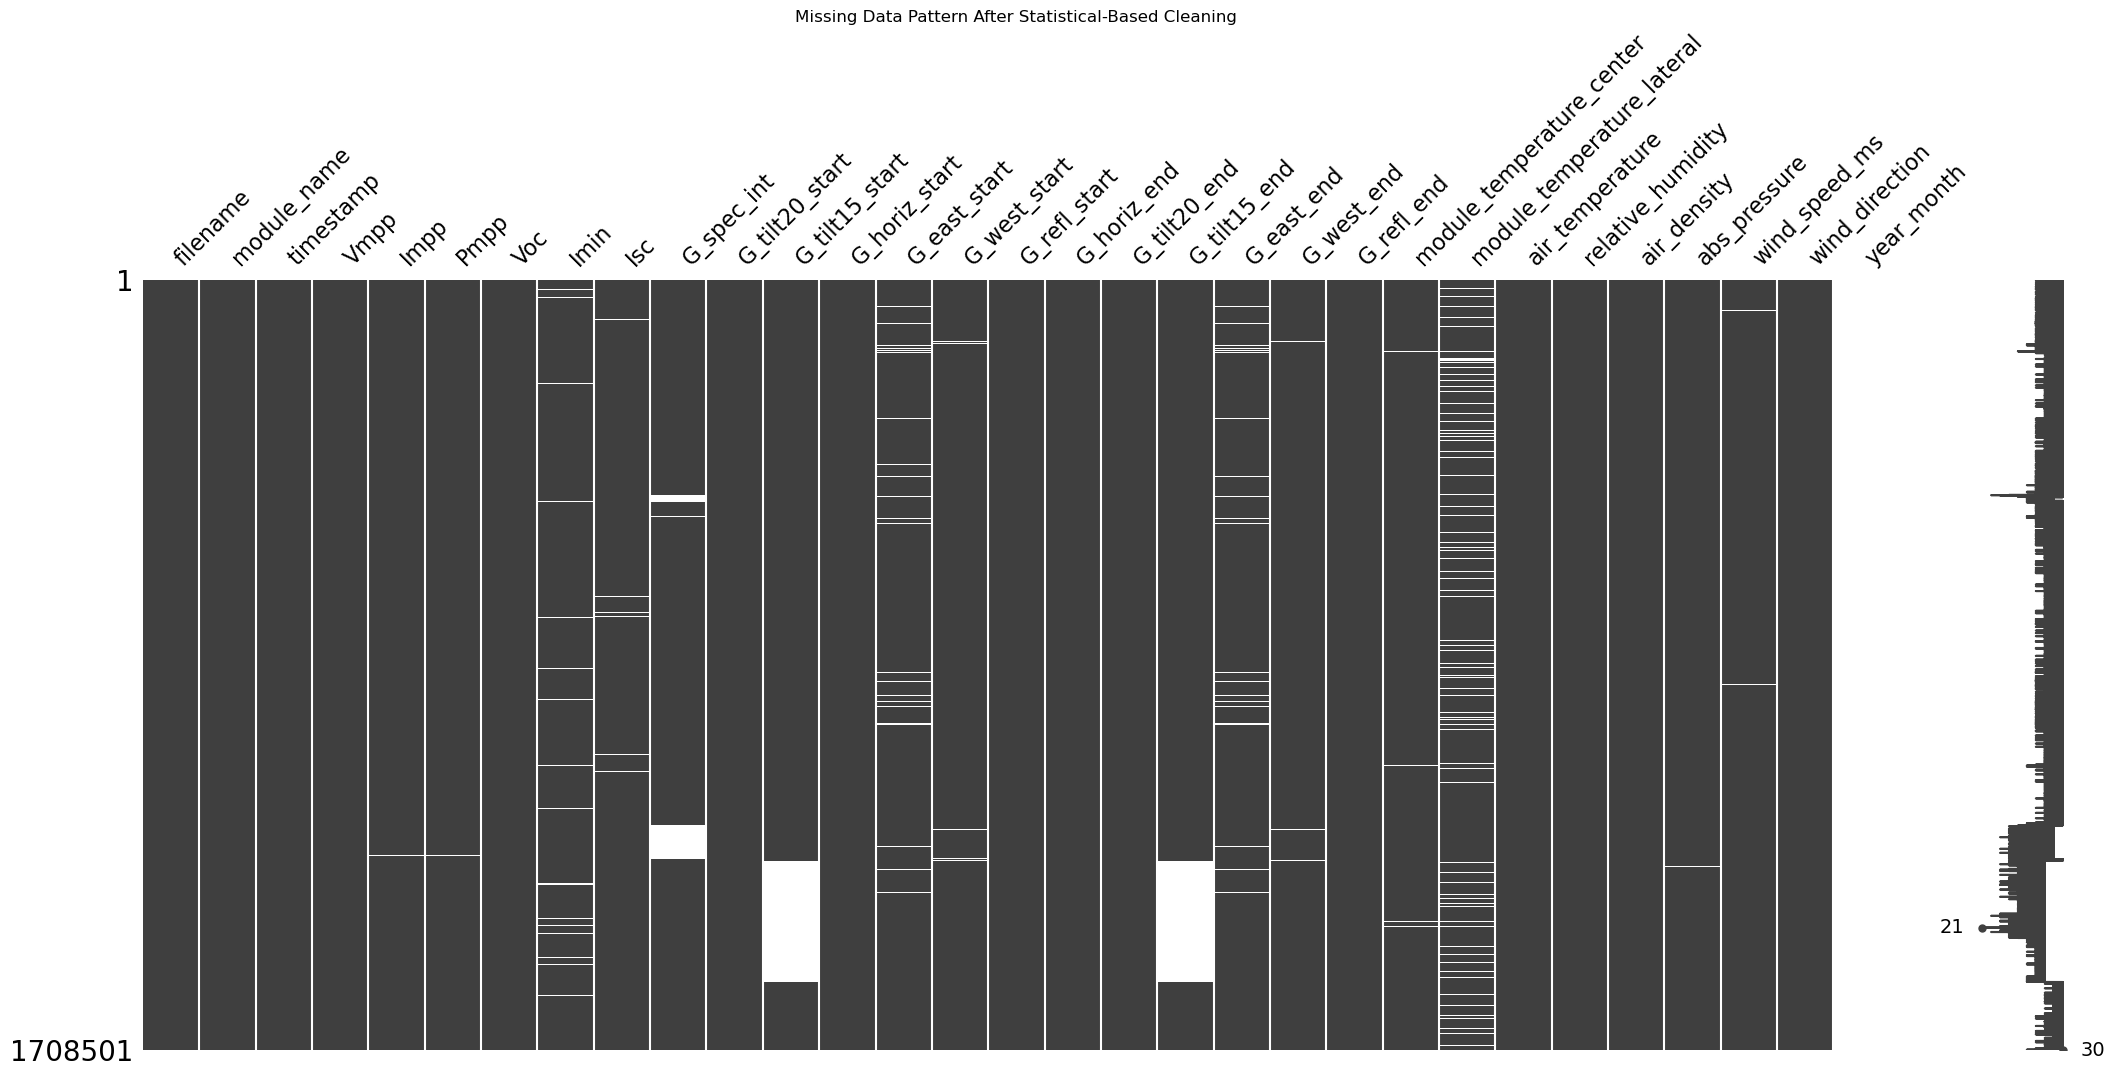

In [14]:
# Visualize where the sensor errors were removed
plt.figure(figsize=(10,6))
msno.matrix(df_statistical)
plt.title("Missing Data Pattern After Statistical-Based Cleaning")
plt.show()

In [15]:
# List before and after cleaning per column
before_counts = df.count()
after_counts = df_statistical.count()

# 2. Create the summary DataFrame
stats_df = pd.DataFrame({
    'Before': before_counts,
    'After': after_counts,
    'Removed': before_counts - after_counts
})

# 3. Add a percentage column (useful for the "Impact potential" section of your report)
stats_df['% Removed'] = ((stats_df['Removed'] / stats_df['Before']) * 100).round(2)

# Display the results
print(stats_df[stats_df['Removed'] > 0])
print(f"Summary: {before_counts.sum() - after_counts.sum()} datapoints removed. {(before_counts.sum() - after_counts.sum())/before_counts.sum()*100:.2f}% of total data.")

                             Before    After  Removed  % Removed
Impp                        1708501  1707208     1293       0.08
Pmpp                        1708501  1704926     3575       0.21
Imin                        1708501  1672954    35547       2.08
Isc                         1708501  1692132    16369       0.96
G_spec_int                  1616184  1616170       14       0.00
G_tilt20_start              1708501  1708493        8       0.00
G_horiz_start               1708501  1708207      294       0.02
G_east_start                1708501  1667457    41044       2.40
G_west_start                1708501  1703004     5497       0.32
G_refl_start                1708501  1708499        2       0.00
G_east_end                  1708501  1667488    41013       2.40
G_west_end                  1708501  1703006     5495       0.32
G_refl_end                  1708501  1708499        2       0.00
module_temperature_center   1708501  1703085     5416       0.32
module_temperature_latera

In [ ]:
df_physics.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,1708501,2024-01-04 04:18:24.911892480,2022-01-01 06:30:01,2023-01-06 14:55:19,2024-01-09 11:38:06,2024-12-29 12:35:19,2025-12-31 15:05:01,NaN
Vmpp,1708501.0,40.105597,-10.956904,31.740629,33.710411,53.30986,84.053757,11.231538
Impp,1708501.0,2.537277,-0.734879,0.605181,1.620352,3.747141,45.34277,2.57368
Pmpp,1708501.0,90.46816,-0.036166,25.803344,63.504062,131.905534,4650.164488,90.970054
Voc,1708501.0,49.180907,-10.928215,37.383969,39.562246,64.835801,88.427892,15.494142
Imin,1708501.0,0.009029,-1.686354,0.002279,0.007824,0.011293,1.403229,0.028199
Isc,1708501.0,-1.832843,-204477.479964,-5.127368,0.315714,2.253118,166111.533805,284.95263
G_spec_int,1537528.0,314.771939,0.0,109.319665,246.275903,490.205706,1239.486486,244.581805
G_tilt20_start,1708489.0,401.489337,11.01,143.05,312.12,630.26,1982.44,302.665252
G_tilt15_start,1439431.0,390.135638,0.0,134.54,300.99,611.36,1460.32,300.741735


In [18]:
df_statistical.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,1708501,2024-01-04 04:18:24.911892480,2022-01-01 06:30:01,2023-01-06 14:55:19,2024-01-09 11:38:06,2024-12-29 12:35:19,2025-12-31 15:05:01,NaN
Vmpp,1708501.0,40.105597,-10.956904,31.740629,33.710411,53.30986,84.053757,11.231538
Impp,1707208.0,2.51714,-0.734879,0.604645,1.618377,3.740213,13.162893,2.454416
Pmpp,1704926.0,88.960548,-0.036166,25.742589,63.289008,131.225458,450.1721,78.670518
Voc,1708501.0,49.180907,-10.928215,37.383969,39.562246,64.835801,88.427892,15.494142
Imin,1672954.0,0.00768,-0.024755,0.002266,0.007304,0.01111,0.038334,0.006876
Isc,1692132.0,-1.510351,-27.268422,-4.891244,0.330825,2.286357,24.209561,7.266236
G_spec_int,1616170.0,299.451166,-0.620279,91.549651,229.801121,472.798475,1239.486486,247.989038
G_tilt20_start,1708493.0,401.493158,11.01,143.05,312.12,630.27,2059.43,302.675203
G_tilt15_start,1439439.0,390.13347,-0.06,134.53,300.98,611.36,1460.32,300.742306


# TODO:

* Add electrical caps for Voc, Isc, Vmpp, Impp, Pmpp based on datasheet
* Run stats after physical limitations
* Visualize variables with many outliers (temperature) 
